In [ ]:
## Musical following study
# Script extracting amplitude envelopes from .wav files
# Written by Lucas Klein - June 2020

In [78]:
# Import functions
%reset -f

from playsound import playsound
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import os

os.chdir('/Users/lucas/Desktop/Musical_following/')

In [79]:
#playsound('T2_regular.wav')

In [80]:
## Find the .wav files and make a list of them
# The data_folder is where each participant's recordings are stored

os.getcwd()
data_folder = '/Users/lucas/Desktop/Musical_following/DATA'
participants = os.listdir(data_folder)
participants.sort()
participants.pop(0) # This takes the '.DS_Store' entry off the list

print(participants)

['Emily', 'Erica', 'Lucas']


In [81]:
## Function that uses wavfile.read to extract data from .wav files

def get_sound(trial):
    sf, a = scipy.io.wavfile.read(trial) # sampling rate SHOULD be 44.1 kHz
    # a is the data returned as a Numpy array. For 24-bit PCM .wav file, Numpy data type is int16
    
    t_samples = len(a) # number of time samples
    t_sec = np.arange(t_samples)*(1/sf) # total length of .wav file in seconds
    
    ae = np.array(a)
    
    return ae, t_samples, t_sec, sf

In [82]:
# def extract_amp_env(sound, print_output = True):
#     t_samples = len(sound)
#     t_sec = np.arange(t_samples)*(1/sample_rate)

#     amp_env = np.array(sound)
#     return amp_env

In [83]:
## EXTRACT AMPLITUDE ENVELOPES
# Loop through participants in data_folder
# For each participant, loop through all trials
# For each trial, read data, detect sampling rate, extract amp env, and save output as .npy

sampling_rates = [] # empty list of sampling rates

for participant in participants: 
    participant_folder = '/Users/lucas/Desktop/Musical_following/DATA/' + participant
    filenames = glob.glob(participant_folder + "/*.wav") # make a list of the the .wav files
    filenames.sort()
    
    # IMPORTANT! Make sure obj. filenames lists trials in the correct order
    # Depending on how participants label their recordings, this list could be in a wonky order
    # This is very important when checking to see how Granger changes over course of trials
    print(filenames)
    
    for triali in filenames:
        trial_num = filenames.index(triali) + 1 # add 1 to avoid having a "Trial 0"
        rec, t_samples, t_sec, sf_triali = get_sound(triali)
        
        sampling_rates += [[sf_triali]] # Add this trial's sampling rate to the list
        
#         amp_env = extract_amp_env(sound, print_output = True) # Makes a 2D array of amplitudes
        
        np.save('/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/{}/Trial_{}.npy'.format(participant,trial_num),rec) # Save amp env as .npy file
        


['/Users/lucas/Desktop/Musical_following/DATA/Emily/gc1.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc2.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc3.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc4.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc5.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc6.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc7.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc8.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc9.wav', '/Users/lucas/Desktop/Musical_following/DATA/Emily/gc_10.wav']
['/Users/lucas/Desktop/Musical_following/DATA/Erica/EricaPiano-1.wav', '/Users/lucas/Desktop/Musical_following/DATA/Erica/EricaPiano-2.wav', '/Users/lucas/Desktop/Musical_following/DATA/Erica/EricaPiano-3.wav', '/Users/lucas/Desktop/Musical_following/DATA/Erica/EricaPiano-4.wav', '/Users/lucas/Desktop/Musical_following/DATA/Erica/EricaPiano-5.wav', '/Users/lucas/Desktop/Musical_follow

In [84]:
# Then do the same as above for the stimulus track

stim_loc = '/Users/lucas/Desktop/Musical_following/ANALYSIS/arp1.wav'
stim, t_samples_stim, t_sec_stim, sf_stim = get_sound(stim_loc)
np.save('/Users/lucas/Desktop/Musical_following/ANALYSIS/arp1.npy',stim) 

In [85]:
print(rec)
print(stim)
# sound = Numpy array of values
# n_samples = number of samples
# t_sec = length of .wav file in seconds
# sampling_rates now lists the sampling rates of each trial so we can make sure they're all 44.1 kHz

[[ 0  0]
 [ 0 -1]
 [ 0  0]
 ...
 [39 40]
 [42 43]
 [46 46]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [86]:
# Check that sampling rates are all 44100
print(sampling_rates)
print(t_samples)
print(max(t_sec))

[[44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100], [44100]]
5418787
122.87496598639456


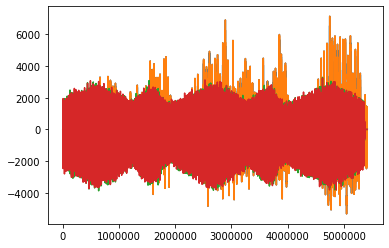

In [92]:
# Look at sound envelopes
plt.plot(rec)
plt.plot(stim)

In [88]:
from scipy import signal

In [89]:
## Design butterworth filter
# filter order = 3, critical freq = .001
# For LP or HP filters, critical freq is a scalar.

b, a = signal.butter(3, 0.001) 

In [94]:
## LOAD saved .npy files back into script as objects
# For each participant, loop through all trials
# For each trial, load the .npy file, take it's absolute value, and apply the filter
# Then save each trial it as a .txt file in a different folder

for participant in participants:
    participant_folder = '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/' + participant
    filenames = glob.glob(participant_folder + "/*.npy") # make a list of the .npy files
    filenames.sort()
    
    # IMPORTANT! Make sure obj. filenames lists trials in the correct order
    # Depending on how participants label their recordings, this list could be in a wonky order
    # This is very important when checking to see how Granger changes over course of trials
    print(filenames)
    
    for triali in filenames:
        trial_num = filenames.index(triali) + 1 # add 1 to avoid having a "Trial 0"
        l = np.load(triali)
        m = np.abs(l)
        rec_filt = signal.filtfilt(b, a, m, axis = 0) # b and a are filter parameters from above, m is data array
        
        #np.savetxt('/Users/lucas/Desktop/Musical_following/ANALYSIS/Txts/{}/Trial_{}.txt'.format(participant,trial_num),rec_filt)
        # This can take a long time...

['/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_1.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_10.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_2.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_3.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_4.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_5.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_6.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_7.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_8.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Emily/Trial_9.npy']
['/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Erica/Trial_1.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Erica/Trial_10.npy', '/Users/lucas/Desktop/Musical_following/ANALYSIS/Npys/Erica/Trial_2.npy', '/Users/lucas/Desktop/Musical_foll

In [95]:
# Then do the same as above for the stimulus track

stim_npy_loc = '/Users/lucas/Desktop/Musical_following/ANALYSIS/arp1.npy'
s = np.load(stim_npy_loc)
t = np.abs(s)
stim_filt = signal.filtfilt(b, a, t, axis = 0) # b and a are filter parameters from above, t is data array
# np.savetxt('/Users/lucas/Desktop/Musical_following/ANALYSIS/arp1.txt',stim_filt) # this can take a while

[[ 0.57729951  0.56861685]
 [ 0.57867035  0.5699721 ]
 [ 0.58004148  0.57132766]
 ...
 [46.7057482  46.70308305]
 [46.70574801 46.70308286]
 [46.70574786 46.7030827 ]]
[[7.87023185e+00 9.23581520e+00]
 [7.92535832e+00 9.29325468e+00]
 [7.98063406e+00 9.35083347e+00]
 ...
 [4.37219653e-29 5.30345324e-29]
 [4.37219632e-29 5.30345301e-29]
 [4.37219616e-29 5.30345283e-29]]


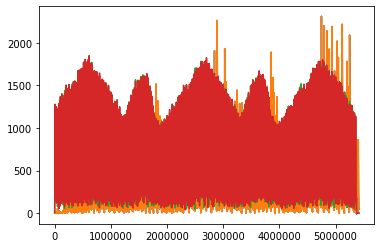

In [98]:
## Look at filtered time series
print(rec_filt)
print(stim_filt)
plt.plot(rec_filt)
plt.plot(stim_filt)
plt.show()

In [97]:
## Correlate two time series

corr = np.correlate(rec_filt,stim_filt)
corr

# I think they need to be truncated

ValueError: object too deep for desired array

In [343]:
# np.size(corr)

1

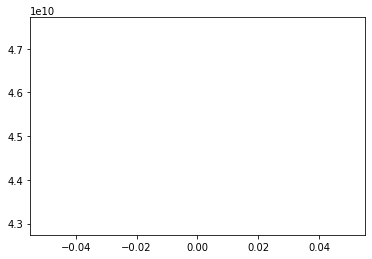

In [344]:
# plt.plot(corr)